In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [19]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 120

In [20]:
tickers = ["AAPL","MSFT","TSLA"]

df = yf.download(tickers, period="1y", auto_adjust=True, progress=False)

In [21]:
df.head()

Price            Close                                High              \
Ticker            AAPL        MSFT        TSLA        AAPL        MSFT   
Date                                                                     
2024-09-16  215.317917  428.125793  226.779999  216.213742  430.299477   
2024-09-17  215.785721  431.907440  227.869995  215.895212  438.557527   
2024-09-18  219.667664  427.599792  227.199997  221.678310  432.780897   
2024-09-19  227.809769  435.421082  243.919998  228.755380  438.210140   
2024-09-20  227.142868  432.026489  238.250000  232.010215  435.966907   

Price                          Low                                Open  \
Ticker            TSLA        AAPL        MSFT        TSLA        AAPL   
Date                                                                     
2024-09-16  229.960007  212.929026  425.029048  223.529999  215.536884   
2024-09-17  234.570007  213.506336  429.048896  226.550003  214.750545   
2024-09-18  235.679993  216.532247  427.202779  226.880005  216.542210   
2024-09-19  244.240005  223.589420  433.644411  232.130005  223.947753   
2024-09-20  243.990005  226.565553  430.984326  235.919998  228.904673   

Price                                  Volume                       
Ticker            MSFT        TSLA       AAPL      MSFT       TSLA  
Date                                                                
2024-09-16  427.391317  229.300003   59357400  13834700   54323000  
2024-09-17  436.949603  229.449997   45519300  18874200   66761600  
2024-09-18  431.758573  230.089996   59894900  18898000   78010200  
2024-09-19  437.942163  234.000000   66781300  21706600  102694600  
2024-09-20  433.961971  241.520004  318679900  55167100   99879100

In [22]:
prices = df['Close']
prices.head()

Ticker,AAPL,MSFT,TSLA
Date,,,
2024-09-16,215.317917,428.125793,226.779999
2024-09-17,215.785721,431.907440,227.869995
2024-09-18,219.667664,427.599792,227.199997
2024-09-19,227.809769,435.421082,243.919998
2024-09-20,227.142868,432.026489,238.250000


In [23]:
normalized = prices / prices.iloc[0] * 100
normalized.head()

Ticker,AAPL,MSFT,TSLA
Date,,,
2024-09-16,100.000000,100.000000,100.000000
2024-09-17,100.217262,100.883303,100.480640
2024-09-18,102.020151,99.877139,100.185201
2024-09-19,105.801585,101.704006,107.557985
2024-09-20,105.491857,100.911110,105.057766


<function matplotlib.pyplot.show(close=None, block=None)>

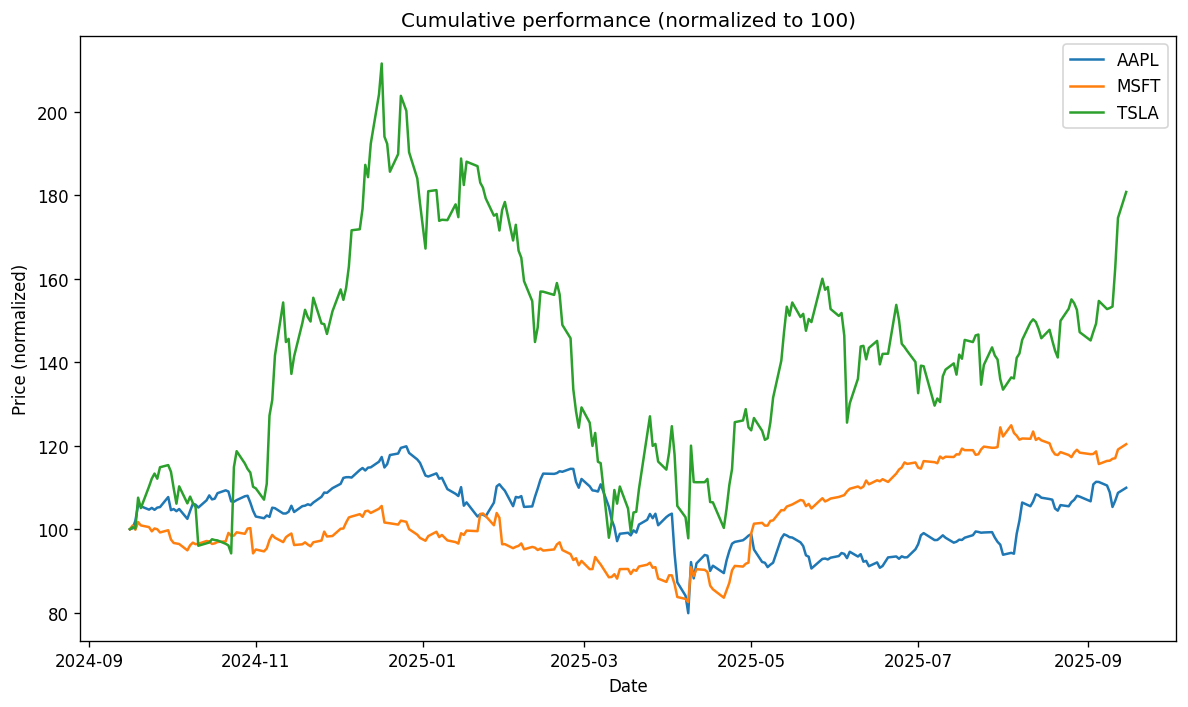

In [24]:
plt.figure()
for ticker in normalized.columns:
    plt.plot(normalized.index, normalized[ticker], label=ticker)

plt.title("Cumulative performance (normalized to 100)")
plt.xlabel("Date")
plt.ylabel("Price (normalized)")
plt.legend()
plt.tight_layout()
plt.show

### Graph above shows the cumulative performance of AAPL, MSFT and TSLA over the past year, normalized to 100 so their growth can be directly compared

In [25]:
returns = prices.pct_change().dropna()
returns.head()

Ticker,AAPL,MSFT,TSLA
Date,,,
2024-09-17,0.002173,0.008833,0.004806
2024-09-18,0.017990,-0.009974,-0.002940
2024-09-19,0.037066,0.018291,0.073592
2024-09-20,-0.002927,-0.007796,-0.023245
2024-09-23,-0.007581,-0.004043,0.049318


In [26]:
corr = returns.corr()
print(corr) 

Ticker      AAPL      MSFT      TSLA
Ticker                              
AAPL    1.000000  0.534339  0.489181
MSFT    0.534339  1.000000  0.439517
TSLA    0.489181  0.439517  1.000000


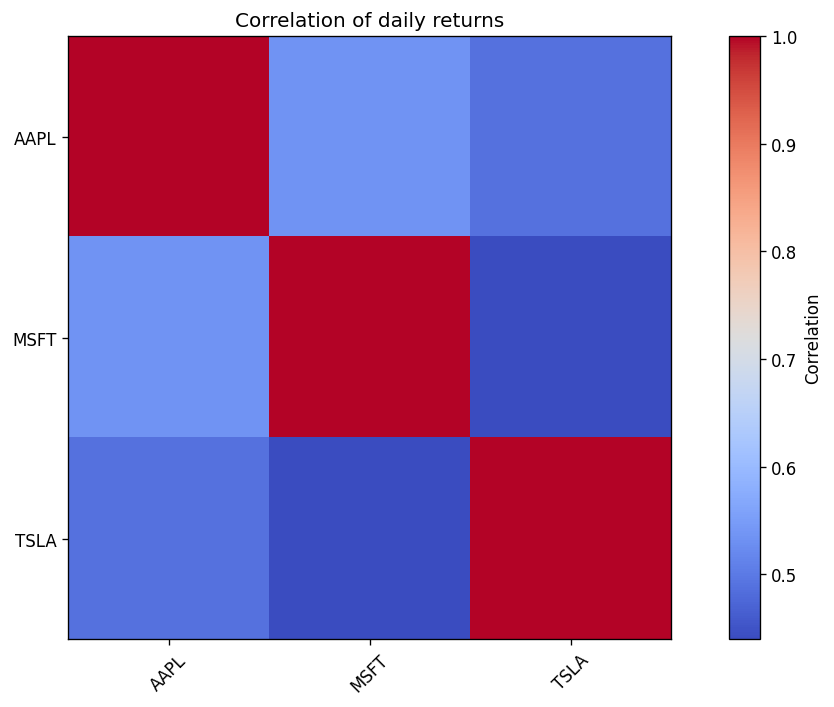

In [27]:
plt.imshow(corr, cmap="coolwarm", interpolation="none")
plt.colorbar(label="Correlation")
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.index)
plt.title("Correlation of daily returns")
plt.tight_layout()
plt.show()

#### The heatmap above shows the correlation of daily returns between APPL, MSFT and TSLA, where red indicates a strong positive correlation and blue indicates a negative correlation.

In [28]:
import numpy as np
weights = np.array([0.5, 0.3, 0.2])

In [29]:
portfolio_returns = (returns * weights).sum(axis=1)
portfolio_returns.head()

Date
2024-09-17    0.004697
2024-09-18    0.005415
2024-09-19    0.038738
2024-09-20   -0.008452
2024-09-23    0.004860
dtype: float64

In [30]:
portfolio_cum = (1 + portfolio_returns).cumprod()

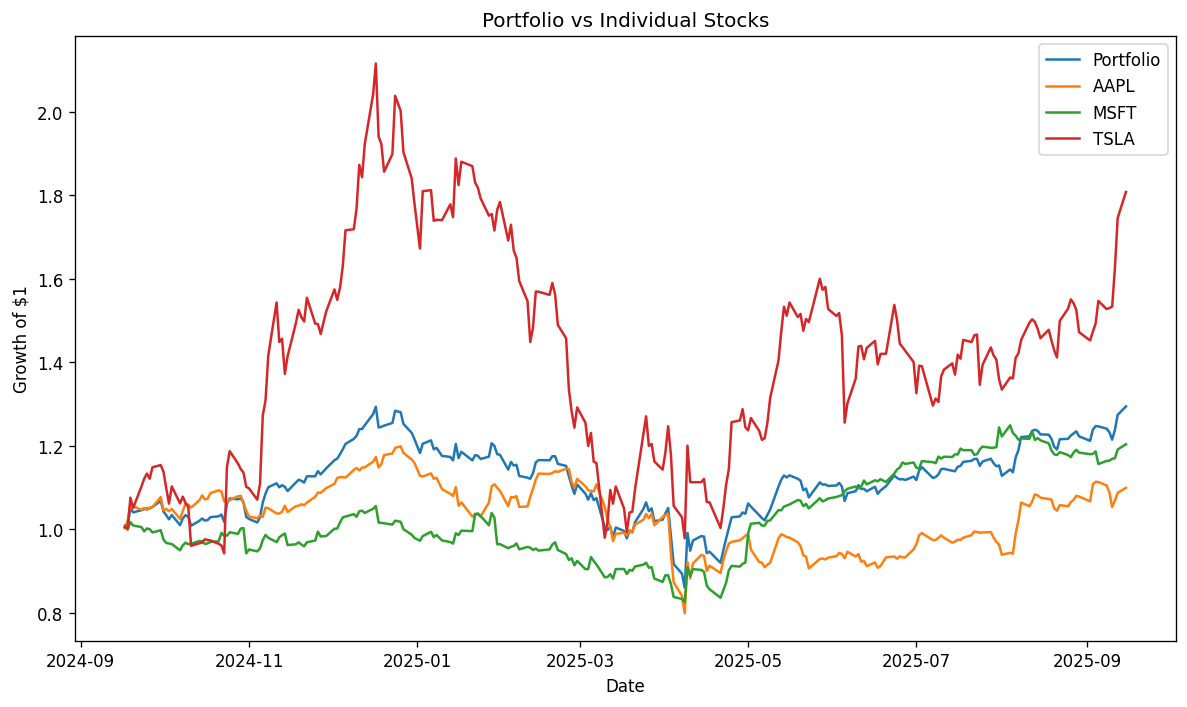

In [31]:
plt.figure()
plt.plot(portfolio_cum, label="Portfolio")
for ticker in returns.columns:
    plt.plot((1 + returns[ticker]).cumprod(), label=ticker)

plt.title("Portfolio vs Individual Stocks")
plt.xlabel("Date")
plt.ylabel("Growth of $1")
plt.legend()
plt.tight_layout()
plt.show()

### The graph above shows how a $1 investment would have grown over time in the portoflio versus each individual stock.